# Desafio Cientista de Dados TV Globo

#### Desafio
O objetivo do Case é prever qual time o usuário torce, baseado em seu consumo, produtos que possui do Grupo Globo e algumas informações demográficas.

### Métodos utilizados:


##### Modelo 1:
A primeira versão do modelo consiste somente na análise de acessos ao site dos usuários, extraindo as informações das urls e encontrando que time cada um dos usuários mais acessa, e comparando com seu time real.

##### Modelo 2:
Uma versão utilizando machine learning e adicionando mais variáveis ao proposto no modelo 1, como Sexo, Estado, Idade e consumo de serviços.

# Modelo 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Abre os arquivos

consumo = pd.read_csv('BD_CONSUMO.csv')
time_br = pd.read_csv('BD_DEM_TIME.csv')
servicos = pd.read_csv('BD_SERVICOS.csv')

In [3]:
consumo.head()

,KEY,tempo,url
0,1666965,1532.0,http://globoesporte.globo.com/mg/futebol/times...
1,2428750,965.0,https://globoesporte.globo.com/futebol/times/b...
2,23359,464.0,http://globoesporte.globo.com/pb/futebol/campe...
3,2451676,3286.0,http://globoesporte.globo.com/sp/santos-e-regi...
4,707389,1195.0,http://globoesporte.globo.com/futebol/times/pa...


In [4]:
time_br.head()

,KEY,SEXO,DTA_NASC,ESTADO,TIME
0,2421280,M,1994.0,Minas Gerais,Cruzeiro
1,1604566,M,1990.0,Bahia,Flamengo
2,133472,M,1985.0,Rio de Janeiro,Botafogo
3,1069773,M,1989.0,Rio Grande do Sul,Gremio
4,2083240,M,1994.0,Sao Paulo,Santos


In [5]:
servicos.head()

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
0,2812202,0,0,0,0,0
1,609314,0,0,0,0,0
2,1837779,0,0,0,0,0
3,950603,0,0,0,0,0
4,2105538,0,0,1,0,0


In [6]:
# usuários distintos em cada dataset

print(consumo.KEY.nunique())
print(servicos.KEY.nunique())
print(time_br.KEY.nunique())

711705
951464
951464


In [7]:
# verifica valores Nan

for column in consumo:
    if consumo[column].isnull().any():
       print('{0} has {1} null values'.format(column, consumo[column].isnull().sum()))

consumo = consumo.dropna()

tempo has 1 null values
url has 1 null values


In [8]:
# verifica valores Nan

for column in time_br:
    if time_br[column].isnull().any():
       print('{0} has {1} null values'.format(column, time_br[column].isnull().sum()))

SEXO has 41170 null values
DTA_NASC has 37023 null values


In [9]:
# verifica valores Nan

for column in servicos:
    if servicos[column].isnull().any():
       print('{0} has {1} null values'.format(column, servicos[column].isnull().sum()))

In [10]:
# extraindo os 10 times principais, com mais torcedores.

times_principais = list(pd.DataFrame(time_br.TIME.value_counts()).reset_index()['index'])[0:10]
times_principais = [element.lower() for element in times_principais]
times_principais = ['sao-paulo' if time == 'sao paulo' else time for time in times_principais]
print(times_principais)

['flamengo', 'corinthians', 'sao-paulo', 'palmeiras', 'vasco', 'cruzeiro', 'santos', 'gremio', 'atletico-mg', 'internacional']


In [11]:
# filtrando o dataset com os times principais

time_br.TIME = [element.lower() for element in time_br.TIME]
time_br.TIME = time_br.TIME.replace('sao paulo', 'sao-paulo')
time_br = time_br[time_br.TIME.isin(times_principais)]

In [12]:
# Igualando os usuários nos datasets

time_br = time_br[time_br.KEY.isin(consumo.KEY.drop_duplicates())]
consumo = consumo[consumo.KEY.isin(time_br.KEY.drop_duplicates())]
servicos = servicos[servicos.KEY.isin(consumo.KEY.drop_duplicates())]

In [13]:
print(consumo.KEY.nunique())
print(servicos.KEY.nunique())
print(time_br.KEY.nunique())

631102
631102
631102


In [14]:
# visualizando alguns exemplos de url

for url in consumo.url.head(5):
    print(url)

http://globoesporte.globo.com/mg/futebol/times/siga-atletico-mg/noticia/diretor-de-futebol-do-atletico-mg-revela-consulta-da-roma-por-maidana.ghtml
http://globoesporte.globo.com/pb/futebol/campeonato-paraibano/
http://globoesporte.globo.com/sp/santos-e-regiao/futebol/times/santos/noticia/conmebol-abre-investigacao-para-verificar-se-santos-escalou-sanchez-de-forma-irregular.ghtml
http://globoesporte.globo.com/futebol/times/palmeiras/noticia/lateral-da-base-do-palmeiras-releva-chegadas-fortes-de-borja-e-diz-que-felipe-melo-quis-orienta-lo.ghtml
http://globoesporte.globo.com/rj/serra-lagos-norte/futebol/noticia/ex-capitao-do-fla-jonatas-desiste-de-retomar-a-carreira-deixei-isso-de-lado.ghtml


In [15]:
%%time

# extraindo o time da página principal acessado pelo usuário

for time in times_principais: 
    consumo.loc[(consumo['url'].str.contains(time + '/', na=False)), 'pag_time'] = time

# extraindo o time da página de campeonato acessada pelo usuário. 
# Ex: http://globoesporte.globo.com/pr/futebol/brasileirao-serie-a/noticia/rodada-20-tudo-o-que-voce-precisa-saber-sobre-parana-x-sao-paulo.ghtml
# o cód extrai o time parana

for time in times_principais: 
    consumo.loc[(consumo['url'].str.contains(time + '-x', na=False)), 'pag_time_campeonato'] = time
    
    
# extraindo o time da página de campeonato acessada pelo usuário. 
# Ex: http://globoesporte.globo.com/pr/futebol/brasileirao-serie-a/noticia/rodada-20-tudo-o-que-voce-precisa-saber-sobre-parana-x-sao-paulo.ghtml
# o cód extrai o time sao-paulo

for time in times_principais: 
    consumo.loc[(consumo['url'].str.contains('x-' + time, na=False)), 'pag_time_campeonato_2'] = time

Wall time: 4min 16s


In [16]:
consumo.head()

,KEY,tempo,url,pag_time,pag_time_campeonato,pag_time_campeonato_2
0,1666965,1532.0,http://globoesporte.globo.com/mg/futebol/times...,atletico-mg,NaN,NaN
2,23359,464.0,http://globoesporte.globo.com/pb/futebol/campe...,NaN,NaN,NaN
3,2451676,3286.0,http://globoesporte.globo.com/sp/santos-e-regi...,santos,NaN,NaN
4,707389,1195.0,http://globoesporte.globo.com/futebol/times/pa...,palmeiras,NaN,NaN
5,2205445,464.0,http://globoesporte.globo.com/rj/serra-lagos-n...,NaN,NaN,NaN


In [17]:
# Agrupa por usuário e time extraído da url

tempo_pag_time = consumo[['KEY', 'pag_time', 'tempo']].groupby(['KEY', 'pag_time']).sum().reset_index()
tempo_pag_time.columns = ['KEY', 'TIME', 'TEMPO_PAG_TIME']
tempo_pag_time.head()

,KEY,TIME,TEMPO_PAG_TIME
0,8,flamengo,14551.0
1,8,vasco,464.0
2,9,corinthians,174016.0
3,9,flamengo,1856.0
4,9,gremio,3011.0


In [18]:
# Agrupa por usuário e time extraído da url

tempo_pag_time_campeonato = consumo[['KEY', 'pag_time_campeonato', 'tempo']].groupby(['KEY', 'pag_time_campeonato']).sum().reset_index()
tempo_pag_time_campeonato.columns = ['KEY', 'TIME', 'TEMPO_PAG_TIME']
tempo_pag_time_campeonato.head()

,KEY,TIME,TEMPO_PAG_TIME
0,9,corinthians,1342.0
1,15,gremio,3444.0
2,15,santos,736.0
3,15,vasco,2154.0
4,68,gremio,3519.0


In [19]:
# Agrupa por usuário e time extraído da url

tempo_pag_time_campeonato_2 = consumo[['KEY', 'pag_time_campeonato_2', 'tempo']].groupby(['KEY', 'pag_time_campeonato_2']).sum().reset_index()
tempo_pag_time_campeonato_2.columns = ['KEY', 'TIME', 'TEMPO_PAG_TIME']
tempo_pag_time_campeonato_2.head()

,KEY,TIME,TEMPO_PAG_TIME
0,9,corinthians,1575.0
1,9,palmeiras,1638.0
2,13,palmeiras,860.0
3,15,flamengo,5598.0
4,44,corinthians,2403.0


In [20]:
# junta os datasets

consumo_tempo = tempo_pag_time.append(tempo_pag_time_campeonato).append(tempo_pag_time_campeonato_2).sort_values('KEY').groupby(['KEY', 'TIME']).sum().reset_index()
consumo_tempo.head()

,KEY,TIME,TEMPO_PAG_TIME
0,8,flamengo,14551.0
1,8,vasco,464.0
2,9,corinthians,176933.0
3,9,flamengo,1856.0
4,9,gremio,3011.0


In [21]:
# Calcula a quantidade de visitas em notícias dos times pra cada usuário

qnt_pag_time = consumo[['KEY', 'pag_time', 'tempo']].groupby(['KEY', 'pag_time']).count().reset_index()
qnt_pag_time.columns = ['KEY', 'TIME', 'QNT_VISITAS']

qnt_pag_time_campeonato = consumo[['KEY', 'pag_time_campeonato', 'tempo']].groupby(['KEY', 'pag_time_campeonato']).count().reset_index()
qnt_pag_time_campeonato.columns = ['KEY', 'TIME', 'QNT_VISITAS']

qnt_pag_time_campeonato_2 = consumo[['KEY', 'pag_time_campeonato_2', 'tempo']].groupby(['KEY', 'pag_time_campeonato_2']).count().reset_index()
qnt_pag_time_campeonato_2.columns = ['KEY', 'TIME', 'QNT_VISITAS']

consumo_qnt = qnt_pag_time.append(qnt_pag_time_campeonato).append(qnt_pag_time_campeonato_2).sort_values('KEY').groupby(['KEY', 'TIME']).sum().reset_index()
consumo_qnt.head()

,KEY,TIME,QNT_VISITAS
0,8,flamengo,11
1,8,vasco,1
2,9,corinthians,156
3,9,flamengo,1
4,9,gremio,3


In [22]:
# Join com o dataset que contém a quantidade de visitas pra cada time

consumo = consumo_tempo.merge(consumo_qnt, on= ['KEY', 'TIME'])
consumo.head()

,KEY,TIME,TEMPO_PAG_TIME,QNT_VISITAS
0,8,flamengo,14551.0,11
1,8,vasco,464.0,1
2,9,corinthians,176933.0,156
3,9,flamengo,1856.0,1
4,9,gremio,3011.0,3


In [23]:
# Multiplica a quantidade de visitas pelo tempo em cada visita a um time

consumo['ENGAJAMENTO_PAG'] = consumo.TEMPO_PAG_TIME * consumo.QNT_VISITAS

In [24]:
# Pra cada usuario, seleciona somente a linha que contém o time que o usuário mais se engajou

consumo.drop(['TEMPO_PAG_TIME', 'QNT_VISITAS'], axis=1, inplace=True)
consumo = consumo.sort_values(['KEY', 'ENGAJAMENTO_PAG'])
consumo = consumo.drop_duplicates('KEY', keep='last')
consumo.head()

,KEY,TIME,ENGAJAMENTO_PAG
0,8,flamengo,160061.0
2,9,corinthians,27601548.0
8,10,palmeiras,15695.0
14,13,palmeiras,1437450.0
18,15,flamengo,685862.0


In [25]:
# Join com o dataset que contém os times de cada usuário


consumo = consumo.merge(time_br[['KEY', 'TIME']], on=['KEY'], how='left')
consumo.columns = ['KEY', 'TIME_ACESSADO', 'ENGAJAMENTO_PAG', 'TIME_REAL']
consumo['TIME_REAL'] = [element.lower() for element in consumo.TIME_REAL]
consumo.TIME_REAL = consumo.TIME_REAL.replace('sao paulo', 'sao-paulo')

In [26]:
consumo.head()

,KEY,TIME_ACESSADO,ENGAJAMENTO_PAG,TIME_REAL
0,8,flamengo,160061.0,flamengo
1,9,corinthians,27601548.0,corinthians
2,10,palmeiras,15695.0,palmeiras
3,13,palmeiras,1437450.0,palmeiras
4,15,flamengo,685862.0,flamengo


In [27]:
print("% de acerto:", round(len(consumo[consumo.TIME_ACESSADO == consumo.TIME_REAL]) / len(consumo), 2))

% de acerto: 0.74


In [28]:
consumo.to_csv('Modelo_01.csv', header=True, index=False, encoding='UTF-8')

__________________________________________________

# Modelo 2

Continuando daqui para utilizar a variável "TIME_ACESSADO" já craiada que contém as informações de cada usuário sobre o time que ele mais demonstrou interesse.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
time_br = pd.read_csv('BD_DEM_TIME.csv')

In [30]:
# substitui valores nan na data de nascimento pela média e remove valores discrepantes ( datas de nascimento menores que 1900 foram descosideradas e maiores que 2010 também)

media_nascimento = round(time_br.DTA_NASC.dropna()[(time_br.DTA_NASC.dropna() > 1900) | (time_br.DTA_NASC.dropna() < 2010)].mean())

time_br.DTA_NASC.fillna(media_nascimento, inplace=True)
time_br.DTA_NASC = time_br.DTA_NASC.astype(int)
time_br.loc[(time_br.DTA_NASC < 1900), 'DTA_NASC'] = media_nascimento
time_br = time_br[time_br.DTA_NASC < 2012]

In [31]:
# substitui os valores "N" e "O" por sexo masculino, que é a variável mais frequente no dataset

time_br = time_br.loc[~time_br.SEXO.isna()]
time_br.loc[time_br.SEXO == 'N', 'SEXO'] = "M"
time_br.loc[time_br.SEXO == 'O', 'SEXO'] = "M"

In [32]:
# ajuste dos nomes dos times e seleciona somente os 10 times principais

time_br.TIME = [element.lower() for element in time_br.TIME]
time_br.TIME = time_br.TIME.replace('sao paulo', 'sao-paulo')
time_br = time_br[time_br.TIME.isin(times_principais)]

In [33]:
# extraindo a idade das datas de nascimento

time_br.DTA_NASC = 2021 - time_br.DTA_NASC
time_br.columns = ['KEY', 'SEXO', 'IDADE', 'ESTADO', 'TIME']

In [34]:
# seleciona usuários em comum nos datasets

consumo = consumo[consumo.KEY.isin(time_br.KEY.drop_duplicates())]
consumo = consumo.merge(time_br[time_br.columns[:-1]], on='KEY', how='left')
consumo = consumo.reindex(['KEY', 'TIME_ACESSADO', 'ENGAJAMENTO_PAG', 'SEXO', 'IDADE', 'ESTADO', 'TIME_REAL'], axis="columns")
consumo.columns = ['KEY', 'TIME_MAIS_ACESSADO', 'ENGAJAMENTO_PAG', 'SEXO', 'IDADE', 'ESTADO', 'TIME_REAL']
consumo.head()

,KEY,TIME_MAIS_ACESSADO,ENGAJAMENTO_PAG,SEXO,IDADE,ESTADO,TIME_REAL
0,8,flamengo,160061.0,M,32,Sao Paulo,flamengo
1,9,corinthians,27601548.0,M,30,Sao Paulo,corinthians
2,10,palmeiras,15695.0,M,26,Santa Catarina,palmeiras
3,13,palmeiras,1437450.0,M,36,Goias,palmeiras
4,15,flamengo,685862.0,M,43,Distrito Federal,flamengo


In [35]:
consumo = consumo.merge(servicos, on='KEY', how='left')

In [36]:
consumo['time_real_2'] = consumo.TIME_REAL

In [44]:
consumo.head()

,KEY,TIME_MAIS_ACESSADO,ENGAJAMENTO_PAG,SEXO,IDADE,ESTADO,TIME_REAL,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO,time_real_2
0,8,flamengo,160061.0,M,32,Sao Paulo,flamengo,0,0,0,0,0,flamengo
1,9,corinthians,27601548.0,M,30,Sao Paulo,corinthians,1,0,1,0,0,corinthians
2,10,palmeiras,15695.0,M,26,Santa Catarina,palmeiras,0,0,0,0,0,palmeiras
3,13,palmeiras,1437450.0,M,36,Goias,palmeiras,0,0,0,0,0,palmeiras
4,15,flamengo,685862.0,M,43,Distrito Federal,flamengo,1,0,0,0,0,flamengo


In [45]:
df = consumo.copy()

In [46]:
from sklearn.preprocessing import LabelEncoder

# Label encoder para transformar strings em números
list_encoder = ['TIME_MAIS_ACESSADO', 'SEXO', 'ESTADO', 'TIME_REAL']

for col in list_encoder:
    X = df.loc[:, [col]].values
    le = LabelEncoder()
    X[:, 0] = le.fit_transform(X[:, 0])
    df[col] = X

In [50]:
df = df.astype(int)
df.head()

,KEY,TIME_MAIS_ACESSADO,SEXO,IDADE,ESTADO,TIME_REAL,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
0,8,3,1,32,26,3,0,0,0,0,0
1,9,1,1,30,26,1,1,0,1,0,0
2,10,6,1,26,25,6,0,0,0,0,0
3,13,6,1,36,9,6,0,0,0,0,0
4,15,3,1,43,6,3,1,0,0,0,0


In [48]:
df[['time_real_2', 'TIME_REAL']].groupby('time_real_2').max().reset_index().to_csv('Tabela_times.csv', header=True, index=False, encoding='UTF-8')

In [49]:
df = df.drop(['ENGAJAMENTO_PAG', 'time_real_2'], axis=1)
df.head()

,KEY,TIME_MAIS_ACESSADO,SEXO,IDADE,ESTADO,TIME_REAL,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
0,8,3,1,32,26,3,0,0,0,0,0
1,9,1,1,30,26,1,1,0,1,0,0
2,10,6,1,26,25,6,0,0,0,0,0
3,13,6,1,36,9,6,0,0,0,0,0
4,15,3,1,43,6,3,1,0,0,0,0


## Seleção de variáveis

In [51]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

# Separando o array em componentes de input e output
X = df.drop(['KEY', 'TIME_REAL'], axis=1).values
Y = df.TIME_REAL.values

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

X_features = df.drop(['KEY', 'TIME_REAL'], axis=1)

# Lista de colunas a serem usadas para treinar cada modelo
features = [col for col in list(X_features) ]
importances =  modelo.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features = [features[idx] for idx in descending_indices]
print('As Variáveis mais importantes são %s' % sorted_features)

As Variáveis mais importantes são ['TIME_MAIS_ACESSADO', 'ESTADO', 'IDADE', 'CARTOLA_PRO', 'GLOBOPLAY', 'SEXO', 'GLOBOSAT_PLAY', 'PREMIERE_PLAY', 'COMBATE']


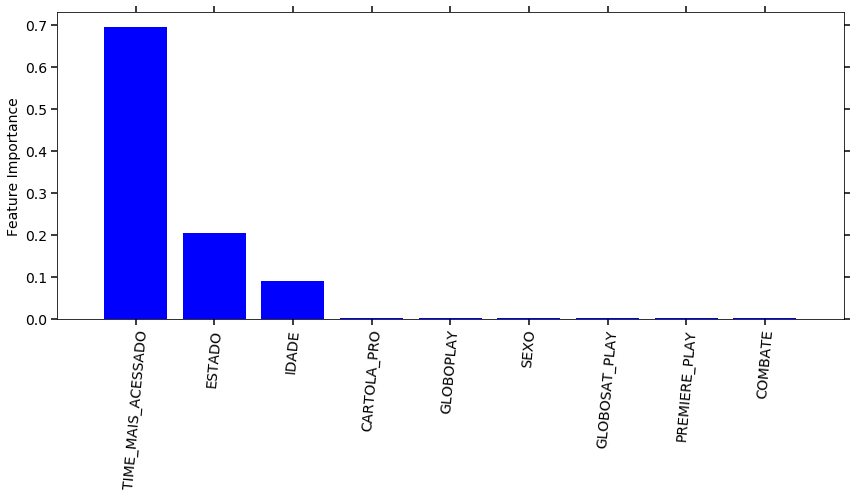

In [52]:
def plot_importances(X_features, sorted_features, sorted_importances):

    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'blue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_features.shape[1]), sorted_importances, color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_features.shape[1]), sorted_features, rotation=85)
    ax = plt.xlim([-1, X_features.shape[1]])
    ax = plt.ylabel('Feature Importance', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

fig1 = plt.figure(1, figsize=(12,7))
ax = plot_importances(X_features, sorted_features, sorted_importances)

plt.show()
plt.close()

In [53]:
# selecionando nos dados apenas as variáveis com mais relevância
df.drop(['GLOBOPLAY', 'GLOBOSAT_PLAY', 'CARTOLA_PRO', 'PREMIERE_PLAY', 'SEXO', 'COMBATE'], axis=1, inplace=True)

In [55]:
df.head()

,KEY,TIME_MAIS_ACESSADO,IDADE,ESTADO,TIME_REAL
0,8,3,32,26,3
1,9,1,30,26,1
2,10,6,26,25,6
3,13,6,36,9,6
4,15,3,43,6,3


O código abaixo testa 3 algoritmos diferentes, utilizando uma técnica de cross validation.

Essa etapa ajuda a identificar as diferentes performances de cada algoritmo e a escolha adequada.

Para cada algoritmo, 5 conjuntos de dados de treinamento e teste distintos e aleatórios serão gerados para previsão e avaliação de cada um dos modelos.

KNN: 0.739676 0.742631 (0.002558)
DecisionTree: 0.766040 0.768952 (0.001569)
RandomForest: 0.765997 0.767412 (0.001065)


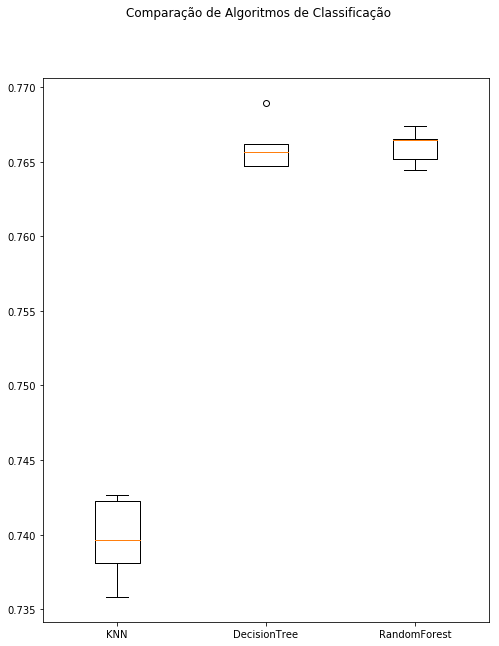

Wall time: 1min 33s


In [56]:
%%time

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


X = df.drop(['KEY', 'TIME_REAL'], axis=1).values
Y = df.TIME_REAL.values

num_folds = 5
modelos = []
resultados = []
nomes = []

modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DecisionTree', DecisionTreeClassifier()))
modelos.append(('RandomForest', RandomForestClassifier()))

for nome, modelo in modelos:
    kfold = KFold(num_folds, True)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f %f (%f)" % (nome, cv_results.mean(), cv_results.max(), cv_results.std())
    print(msg)


fig = plt.figure(figsize= (8,10))
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

##### Como não houve grande diferença entre o desempenho dos algoritimos. optei por avançar com o KNN

In [57]:
%%time

# Otimização do valor de K

from sklearn.model_selection import train_test_split

# Divisão em dados de treino e de teste
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.30)

# Range de valores de k que iremos testar
kVals = range(5, 25, 2)

# Lista vazia para receber as acurácias
acuracias = []

# Loop em todos os valores de k para testar cada um deles
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(X_treino, Y_treino)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(testeData, testeLabels)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)

Com valor de k = 5, a acurácia é = 73.98%
Com valor de k = 7, a acurácia é = 75.09%
Com valor de k = 9, a acurácia é = 75.36%
Com valor de k = 11, a acurácia é = 75.76%
Com valor de k = 13, a acurácia é = 75.79%
Com valor de k = 15, a acurácia é = 75.87%
Com valor de k = 17, a acurácia é = 75.97%
Com valor de k = 19, a acurácia é = 76.00%
Com valor de k = 21, a acurácia é = 76.02%
Com valor de k = 23, a acurácia é = 75.95%
Wall time: 2min 43s


In [58]:
# treino do modelo final e previsões nos dados de teste

modeloKNN = KNeighborsClassifier(n_neighbors = 15)
modeloKNN.fit(X_treino, Y_treino)

ypred = modeloKNN.predict(testeData)

In [59]:
# Avaliação do modelo

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ConfusionMatrix = confusion_matrix(testeLabels, ypred)
print("Confusion Matrix:")
print(ConfusionMatrix, '\n')

ClassificationReport = classification_report(testeLabels, ypred)
print("Classification Report:",)
print (ClassificationReport, '\n')

accuracy = accuracy_score(testeLabels, ypred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[ 3768   324   885   367    24     6   200    82   107    98]
 [  155 20172   269  1414   176    92  2722  2535  1409   247]
 [  544   431  7312   770    34     7   249   131   210   107]
 [  173  1064   442 33763   271   116   877   482   558  1143]
 [   28   204    24   583  7085   442   120   124   122    58]
 [   19   122    17   271   875  3993   101    51    49    30]
 [  102  1176   329   822   110    76 18081  1223   603   153]
 [  126   446   149   497    43    15   397  7852   451    69]
 [  130  2073   200  1285   152    89  1735  1758 18544   322]
 [   76   447   218  2706    86    36   475   248   391  8875]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      5861
           1       0.76      0.69      0.72     29191
           2       0.74      0.75      0.74      9795
           3       0.79      0.87      0.83     38889
           4       0.80      0.81      0.80      8790
 

In [64]:
previsoes = modeloKNN.predict(X)

In [71]:
pd.DataFrame(ConfusionMatrix).to_csv('ConfusionMatrix_Modelo_02.csv', header=True, index=False, encoding='UTF-8')

In [72]:
pd.DataFrame(ConfusionMatrix)

,0,1,2,3,4,5,6,7,8,9
0,3578,349,816,367,10,3,244,127,116,92
1,113,20611,297,1361,196,85,2689,2468,1417,295
2,415,526,7354,745,18,3,339,173,168,119
3,143,1156,408,33737,290,146,861,467,543,1198
4,24,210,51,532,7013,498,116,121,109,40
5,19,122,26,237,798,4103,131,53,60,19
6,59,1419,194,812,116,73,17883,1241,584,177
7,90,611,164,468,34,19,387,7977,244,94
8,145,2116,210,1246,146,72,1692,1748,18342,305
9,57,403,188,2721,75,35,487,257,338,9066


In [69]:
consumo[['time_real_2', 'TIME_REAL']].groupby('time_real_2').max().reset_index()

,time_real_2,TIME_REAL
0,atletico-mg,atletico-mg
1,corinthians,corinthians
2,cruzeiro,cruzeiro
3,flamengo,flamengo
4,gremio,gremio
5,internacional,internacional
6,palmeiras,palmeiras
7,santos,santos
8,sao-paulo,sao-paulo
9,vasco,vasco


In [75]:
a =pd.read_csv('Tabela_times.csv')

In [76]:
a

,time_real_2,TIME_REAL
0,atletico-mg,0
1,corinthians,1
2,cruzeiro,2
3,flamengo,3
4,gremio,4
5,internacional,5
6,palmeiras,6
7,santos,7
8,sao-paulo,8
9,vasco,9


In [65]:
consumo['predictions'] = previsoes

In [68]:
consumo[['KEY', 'TIME_REAL', 'predictions']].to_csv('Modelo_02.csv', header=True, index=False, encoding='UTF-8')